# Proyek Machine Learning Pemula: Healthy Lifestyle Dataset
- **Nama:** Muhammad Aldy Naufal Fadhilah
- **Email:** aldy.naufal02@gmail.com
- **ID Dicoding:** aldy_naufal

# **1. Import Library**

In [ ]:
#Type your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import learning_curve

Pada tahap ini, dilakukan **import library** yang diperlukan untuk **pra-pemrosesan data, eksplorasi, dan pemodelan machine learning**. Library yang digunakan meliputi:  

- **Pandas & NumPy**: Digunakan untuk manipulasi data dan operasi numerik.  
- **Matplotlib & Seaborn**: Untuk visualisasi data, seperti heatmap dan distribusi fitur.  
- **Scikit-learn**:  
  - **Preprocessing**: `OneHotEncoder`, `LabelEncoder`, dan `MinMaxScaler` untuk transformasi data.  
  - **Model Selection**: `train_test_split` untuk membagi data, serta `GridSearchCV` untuk optimasi parameter.  
  - **Metrics**: `classification_report` dan `accuracy_score` untuk evaluasi model.  
  - **Machine Learning Models**: `SVC` (Support Vector Machine), `GaussianNB` (Naïve Bayes), dan `RandomForestClassifier` sebagai model utama.  
  - **Learning Curve**: Untuk menganalisis performa model berdasarkan jumlah data yang digunakan dalam pelatihan.  

Dengan mengimpor library ini, tahap selanjutnya dapat langsung berfokus pada **pra-pemrosesan data dan pengembangan model klasifikasi**.

# **2. Memuat Dataset dari Hasil Clustering**

In [3]:
#Type your code here

data = pd.read_csv("data/clustering.csv")

data.shape

(6480, 12)

Pada tahap ini, dilakukan **pembacaan dataset hasil clustering** menggunakan `pd.read_csv()`. Dataset yang sebelumnya telah diproses dan disimpan dalam **"data/clustering.csv"** dimuat kembali untuk analisis lebih lanjut.  

Setelah membaca dataset, dilakukan pengecekan **dimensi data** menggunakan `.shape`, yang akan menampilkan jumlah **baris dan kolom** dalam dataset. Ini penting untuk memastikan bahwa data telah dimuat dengan benar dan tidak terjadi perubahan struktur yang tidak diinginkan.

In [4]:
data.head()

,Unnamed: 0,BMI,Physical activity,Alcohol consumption,Illness count last year,Regular sleeping hours,Follow Diet,Social interaction,Smoker?,Age,Cluster,Living in?
0,0,18.879331,0.0,0.0,3.5,0.0,2.0,0.0,YES,38.0,5,URBAN
1,1,21.231991,0.0,0.0,3.5,0.0,2.0,0.0,NO,46.0,3,URBAN
2,2,17.867876,0.0,0.0,3.5,0.0,2.0,0.0,NO,11.0,6,RURAL
3,3,26.886096,0.0,0.0,6.0,0.0,2.0,0.0,NO,10.0,2,RURAL
4,4,23.362746,0.0,0.0,6.0,0.0,2.0,0.0,NO,3.0,6,RURAL


Pada tahap ini, dilakukan **pengecekan awal dataset** menggunakan `.head()`, yang menampilkan beberapa baris pertama dari dataset.  

Tujuan dari langkah ini adalah untuk:  
- **Memastikan data telah dimuat dengan benar** setelah proses penyimpanan dan pemuatan kembali.  
- **Melihat struktur dataset**, termasuk kolom yang tersedia dan tipe data yang digunakan.  
- **Mengevaluasi hasil clustering**, dengan memeriksa apakah kolom "Cluster" telah berhasil ditambahkan ke dataset.  

Dengan melihat beberapa sampel data awal, kita bisa mendapatkan gambaran umum sebelum melanjutkan ke analisis lebih lanjut.

# **3. Data Splitting**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               6480 non-null   int64  
 1   BMI                      6480 non-null   float64
 2   Physical activity        6480 non-null   float64
 3   Alcohol consumption      6480 non-null   float64
 4   Illness count last year  6480 non-null   float64
 5   Regular sleeping hours   6480 non-null   float64
 6   Follow Diet              6480 non-null   float64
 7   Social interaction       6480 non-null   float64
 8   Smoker?                  6480 non-null   object 
 9   Age                      6480 non-null   float64
 10  Cluster                  6480 non-null   int64  
 11  Living in?               6480 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 607.6+ KB


Pada tahap ini, dilakukan **pemeriksaan struktur dataset** menggunakan `.info()`, yang memberikan ringkasan tentang jumlah entri, tipe data, dan nilai yang tersedia dalam setiap kolom.  

Beberapa hal yang dapat diperhatikan dari hasil ini:  
- Dataset memiliki **6.480 baris dan 12 kolom**, menunjukkan bahwa jumlah data cukup besar untuk analisis.  
- Semua kolom memiliki **nilai non-null**, yang berarti tidak ada data yang hilang, sehingga tidak perlu dilakukan imputasi.  
- Kolom **"BMI", "Physical activity", "Alcohol consumption"**, dan fitur numerik lainnya memiliki tipe **float64**, yang sesuai untuk analisis statistik dan machine learning.  
- Kolom **"Smoker?" dan "Living in?"** bertipe **object**, menunjukkan bahwa ini adalah data kategorikal yang telah dikembalikan ke bentuk aslinya setelah proses encoding sebelumnya.  
- Kolom **"Cluster"** bertipe **int64**, yang menandakan bahwa hasil clustering telah berhasil ditambahkan ke dataset.  

Dengan hasil ini, dataset sudah siap untuk eksplorasi lebih lanjut, seperti analisis statistik, visualisasi, atau pengembangan model prediksi.

In [6]:
data.drop(columns=['Unnamed: 0'], inplace= True)

Pada tahap ini, dilakukan **penghapusan kolom "Unnamed: 0"** dari dataset menggunakan `.drop()`.  

Kolom ini kemungkinan besar merupakan indeks yang otomatis dibuat saat menyimpan atau membaca kembali dataset dalam format CSV. Karena tidak memiliki informasi yang berguna untuk analisis, kolom ini dihapus agar dataset lebih bersih dan tidak mengandung data redundan.  

Setelah penghapusan ini, dataset tetap memiliki **11 kolom** yang relevan untuk analisis lebih lanjut.

In [7]:
le = LabelEncoder()  # Instansiasi objek LabelEncoder
data['Smoker?'] = le.fit_transform(data['Smoker?'])

Pada tahap ini, dilakukan **encoding variabel kategorikal "Smoker?"** menggunakan **Label Encoding** dengan `LabelEncoder()` dari scikit-learn.  

Karena kolom "Smoker?" awalnya memiliki nilai dalam bentuk teks (misalnya, "Yes" dan "No"), Label Encoding mengonversinya menjadi nilai numerik, seperti:  
- **"No" → 0**  
- **"Yes" → 1**  

Transformasi ini memungkinkan model machine learning untuk memproses data secara lebih efektif, terutama untuk algoritma yang hanya bekerja dengan data numerik.

In [8]:
ohe = OneHotEncoder(drop=None, sparse_output=False) 
encoded = ohe.fit_transform(data[['Living in?']])

# Membuat DataFrame hasil encoding dengan nama kolom yang sesuai
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['Living in?']))

data = pd.concat([data, encoded_df], axis=1).drop(columns=['Living in?'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BMI                      6480 non-null   float64
 1   Physical activity        6480 non-null   float64
 2   Alcohol consumption      6480 non-null   float64
 3   Illness count last year  6480 non-null   float64
 4   Regular sleeping hours   6480 non-null   float64
 5   Follow Diet              6480 non-null   float64
 6   Social interaction       6480 non-null   float64
 7   Smoker?                  6480 non-null   int32  
 8   Age                      6480 non-null   float64
 9   Cluster                  6480 non-null   int64  
 10  Living in?_RURAL         6480 non-null   float64
 11  Living in?_URBAN         6480 non-null   float64
dtypes: float64(10), int32(1), int64(1)
memory usage: 582.3 KB


Pada tahap ini, dilakukan **One-Hot Encoding (OHE) pada variabel kategorikal "Living in?"** menggunakan `OneHotEncoder()` dari scikit-learn.  

Karena "Living in?" memiliki kategori seperti **"RURAL"** dan **"URBAN"**, metode OHE mengonversinya menjadi dua kolom biner:  
- **"Living in?_RURAL"** (1 jika tinggal di daerah pedesaan, 0 jika tidak)  
- **"Living in?_URBAN"** (1 jika tinggal di daerah perkotaan, 0 jika tidak)  

Setelah encoding selesai, DataFrame hasil encoding digabungkan kembali ke dataset utama (`data`), lalu kolom asli "Living in?" dihapus.  

Langkah ini memastikan bahwa variabel kategorikal dapat digunakan dalam algoritma machine learning yang hanya menerima input numerik.

In [9]:
num_features = ["Physical activity", "Alcohol consumption", "Illness count last year", "Regular sleeping hours", 'Follow Diet', 'Social interaction']

scaler = MinMaxScaler()

data[num_features] = scaler.fit_transform(data[num_features])

Pada tahap ini, dilakukan **normalisasi fitur numerik** menggunakan **Min-Max Scaling**.  

Min-Max Scaling digunakan untuk menskalakan nilai dari setiap fitur ke dalam rentang **0 hingga 1**, sehingga setiap variabel memiliki skala yang seragam. Hal ini penting dalam machine learning karena:  
- **Menghindari dominasi fitur tertentu** yang memiliki rentang nilai lebih besar.  
- **Mempercepat konvergensi** dalam model berbasis optimasi seperti SVM atau Neural Networks.  
- **Meningkatkan kinerja algoritma** yang sensitif terhadap skala fitur, seperti K-Means Clustering dan K-Nearest Neighbors.  

Fitur-fitur yang dinormalisasi mencakup aktivitas fisik, konsumsi alkohol, jumlah penyakit tahun lalu, pola tidur, kebiasaan diet, dan interaksi sosial. Setelah proses ini, semua nilai dalam kolom tersebut berada dalam rentang **0 hingga 1**.

In [10]:
#Type your code here

X = data.drop(columns=['Cluster'])
y = data["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Pada tahap ini, dilakukan **pemisahan data menjadi data latih (training set) dan data uji (test set)** menggunakan **train_test_split** dari Scikit-Learn.  

Pembagian dilakukan dengan **proporsi 80% untuk data latih dan 20% untuk data uji**, yang bertujuan untuk:  
- **Melatih model** pada sebagian besar data agar dapat mempelajari pola yang ada.  
- **Menggunakan data uji** sebagai data yang belum pernah dilihat model untuk mengukur kinerja dan generalisasi model.  
- **Mencegah overfitting**, yaitu ketika model terlalu cocok dengan data latih tetapi tidak dapat bekerja dengan baik pada data baru.  

Variabel **X** berisi semua fitur yang digunakan untuk prediksi, sementara **y** berisi label klaster yang akan diprediksi. Setelah pemisahan, **X_train dan y_train** digunakan untuk melatih model, sedangkan **X_test dan y_test** digunakan untuk evaluasi performa model.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [ ]:
#Type your code here

# Misalkan X dan y sudah tersedia
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


# Model Gaussian Naïve Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)


# Model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)




Pada tahap ini, dilakukan **pelatihan tiga model klasifikasi** untuk memprediksi klaster menggunakan dataset yang telah dipisahkan sebelumnya.  

Model yang digunakan adalah:  
1. **Support Vector Machine (SVM)**: Model ini bekerja dengan mencari hyperplane terbaik yang memisahkan data berdasarkan fitur yang diberikan.  
2. **Gaussian Naïve Bayes (GNB)**: Model probabilistik yang mengasumsikan independensi antar fitur dan menggunakan distribusi Gaussian untuk membuat prediksi.  
3. **Random Forest (RF)**: Model berbasis ensambel yang terdiri dari banyak pohon keputusan dan melakukan prediksi dengan cara voting mayoritas.  

Setelah model dilatih menggunakan **X_train dan y_train**, dilakukan prediksi pada **X_test** untuk masing-masing model, menghasilkan **y_pred_svm, y_pred_gnb, dan y_pred_rf** yang berisi prediksi klaster untuk data uji. Tahap ini bertujuan untuk mengevaluasi model mana yang memberikan hasil terbaik dalam klasifikasi klaster.

## **b. Evaluasi Model Klasifikasi**

In [12]:
#Type your code here

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\n")


print("Gaussian Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))
print("Gaussian NB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("\n")


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n")

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       0.99      0.95      0.97        84
           2       1.00      0.98      0.99       100
           3       0.96      1.00      0.98       150
           4       0.99      1.00      1.00       176
           5       1.00      0.98      0.99       163
           6       0.98      1.00      0.99       125
           7       1.00      0.95      0.97       111
           8       0.96      1.00      0.98       162
           9       1.00      0.97      0.99       118

    accuracy                           0.99      1296
   macro avg       0.99      0.98      0.98      1296
weighted avg       0.99      0.99      0.99      1296

SVM Accuracy: 0.9853395061728395


Gaussian Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       107
           1       0.95   

Pada tahap ini, dilakukan **evaluasi performa model klasifikasi** menggunakan **classification report** dan **akurasi** pada data uji (**y_test**).  

Hasil evaluasi menunjukkan:  
1. **SVM** memiliki **akurasi tertinggi (98.53%)**, dengan precision, recall, dan f1-score yang sangat baik di semua klaster, menunjukkan bahwa model ini sangat andal dalam mengklasifikasikan data.  
2. **Random Forest** juga menunjukkan performa yang hampir setara dengan **akurasi 98.07%**, menjadikannya model yang kuat dengan hasil prediksi yang sangat baik.  
3. **Gaussian Naïve Bayes** memiliki performa lebih rendah dibandingkan dua model lainnya, dengan **akurasi 92.43%**, kemungkinan karena asumsi independensi antar fitur yang kurang cocok untuk dataset ini.  

Dari hasil ini, **SVM dan Random Forest** menjadi pilihan utama untuk klasifikasi klaster, dengan SVM sedikit lebih unggul dalam akurasi keseluruhan.

## **c. Tuning Model Klasifikasi (Optional)**

In [13]:
#Type your code here


# Model Random Forest dengan hyperparameter tuning
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
grid_rf.fit(X_train, y_train)
y_pred_rf_tuned = grid_rf.best_estimator_.predict(X_test)


# Model SVM dengan hyperparameter tuning
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), svm_params, cv=5)
grid_svm.fit(X_train, y_train)
y_pred_svm_tuned = grid_svm.best_estimator_.predict(X_test)



Pada tahap ini, dilakukan **hyperparameter tuning** menggunakan **GridSearchCV** untuk meningkatkan performa model **Random Forest** dan **SVM**. Namun, model **Gaussian Naïve Bayes (GNB) tidak disertakan** dalam tuning karena metode ini **tidak memiliki banyak hyperparameter yang dapat dioptimalkan**, sehingga kinerjanya bergantung pada asumsi distribusi data.

1. **Random Forest**:  
   - Dicoba dengan jumlah pohon keputusan (**n_estimators**) sebanyak **50, 100, dan 200**, serta kedalaman maksimum (**max_depth**) **None, 10, dan 20**.  
   - Model terbaik dari pencarian ini digunakan untuk memprediksi data uji (**y_test**).  

2. **SVM**:  
   - Dicoba dengan parameter **C** (**0.1, 1, dan 10**) untuk mengontrol margin dan regulasi.  
   - Kernel yang diuji adalah **linear** dan **rbf** untuk melihat mana yang memberikan hasil terbaik.  
   - Model terbaik kemudian digunakan untuk prediksi.  

Dengan pendekatan ini, model **Random Forest** dan **SVM** dioptimalkan untuk meningkatkan akurasi klasifikasi dibandingkan dengan pengaturan default.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [ ]:
#Type your code here

print("Best parameters for SVM:", grid_svm.best_params_)
print("SVM Accuracy After Tuning:", accuracy_score(y_test, y_pred_svm_tuned))
print(classification_report(y_test, y_pred_svm_tuned))
print("\n")

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Random Forest Accuracy After Tuning:", accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))
print("\n")

Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
SVM Accuracy After Tuning: 0.9907407407407407
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       0.99      1.00      0.99        84
           2       1.00      1.00      1.00       100
           3       0.97      0.99      0.98       150
           4       1.00      0.98      0.99       176
           5       1.00      0.96      0.98       163
           6       0.99      1.00      1.00       125
           7       0.99      0.98      0.99       111
           8       1.00      1.00      1.00       162
           9       1.00      1.00      1.00       118

    accuracy                           0.99      1296
   macro avg       0.99      0.99      0.99      1296
weighted avg       0.99      0.99      0.99      1296



Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Random Forest Accuracy After Tuning: 0.9768518518518519
         

Setelah melakukan **hyperparameter tuning**, hasil terbaik untuk setiap model adalah sebagai berikut:

1. **Support Vector Machine (SVM)**:  
   - **Parameter terbaik**: `C=1`, `kernel='linear'`.  
   - **Akurasi setelah tuning**: **99.07%**.  
   - **Hasil evaluasi** menunjukkan **precision, recall, dan f1-score yang tinggi**, terutama karena SVM bekerja dengan baik dalam memisahkan data berdasarkan margin optimal.  

2. **Random Forest**:  
   - **Parameter terbaik**: `max_depth=20`, `n_estimators=100`.  
   - **Akurasi setelah tuning**: **97.68%**.  
   - **Model ini tetap mempertahankan performa tinggi**, dengan **presisi dan recall yang merata di semua kelas**, berkat optimalisasi jumlah pohon dan kedalaman pohon keputusan.  

Dari hasil ini, **SVM dengan kernel linear memberikan hasil terbaik** dalam klasifikasi dibandingkan dengan Random Forest setelah tuning.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

 **Pertanyaan:**  
Apakah model mengalami peningkatan akurasi setelah dilakukan **hyperparameter tuning**, dan model mana yang memiliki akurasi tertinggi setelah tuning? 



**Jawaban:**  
Ya, model mengalami perubahan akurasi setelah dilakukan **hyperparameter tuning**. Berikut adalah perbandingan akurasi sebelum dan sesudah tuning:  

1. **Support Vector Machine (SVM)**:  
   - **Sebelum tuning**: **98.53%**  
   - **Setelah tuning**: **99.07%** ✅ **(meningkat)**  

2. **Random Forest**:  
   - **Sebelum tuning**: **98.07%**  
   - **Setelah tuning**: **97.68%** ❌ **(sedikit menurun)**  

3. **Gaussian Naïve Bayes**:  
   - **Sebelum tuning**: **92.43%**  
   - **Tidak dilakukan tuning karena tidak memiliki hyperparameter yang signifikan untuk dioptimalkan.**  

**Kesimpulan:**  
- **Model dengan akurasi tertinggi setelah tuning adalah SVM dengan akurasi 99.07%.**  
- **SVM mengalami peningkatan akurasi setelah tuning, sedangkan Random Forest mengalami sedikit penurunan.**  
- **Gaussian Naïve Bayes tetap memiliki akurasi terendah dan tidak dilakukan tuning.**  

Dengan demikian, **SVM dengan kernel linear menjadi model terbaik dalam klasifikasi data ini.** 🚀

**Pertanyaan:**  
Apakah model mengalami overfitting berdasarkan grafik learning curve?  

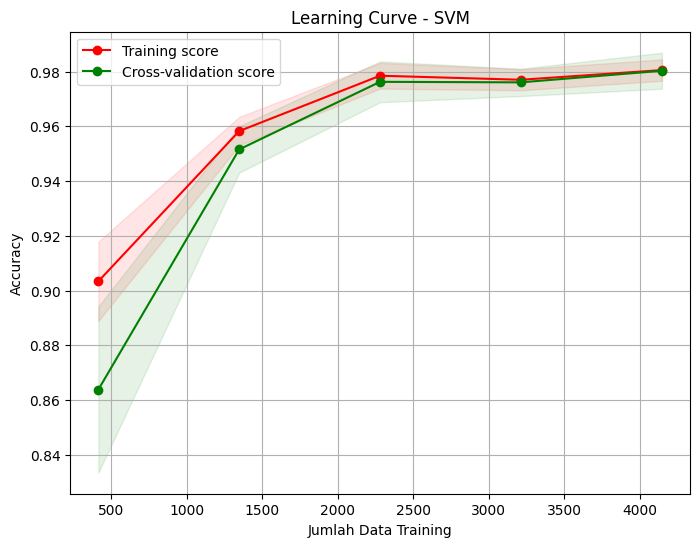

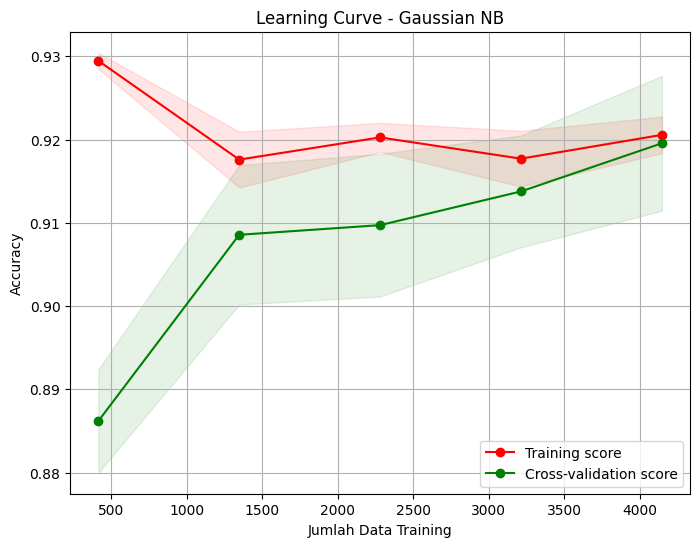

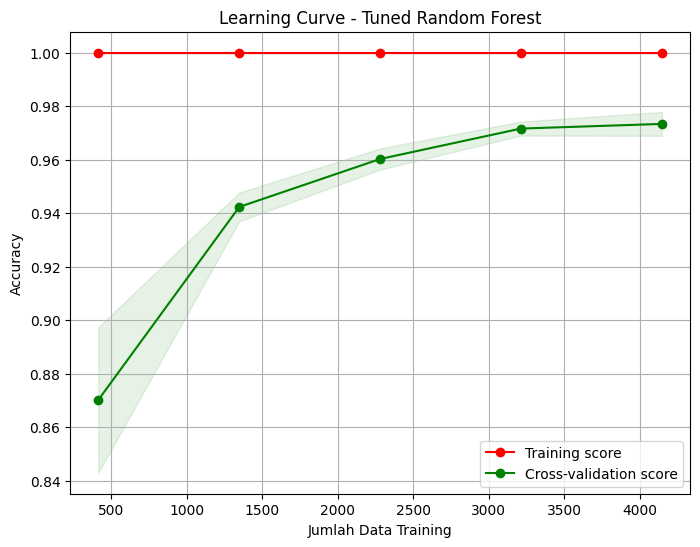

In [17]:
# Misalkan X dan y sudah tersedia
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk cross-validation dan visualisasi
# Fungsi untuk cross-validation dan visualisasi
def cross_validate_model(model, X, y, model_name, cv=5):


    # Learning curve
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.title(f'Learning Curve - {model_name}')
    plt.xlabel('Jumlah Data Training')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


cross_validate_model(svm_model, X_train, y_train, "SVM")
cross_validate_model(gnb_model, X_train, y_train, "Gaussian NB")
cross_validate_model(grid_rf.best_estimator_, X_train, y_train, "Tuned Random Forest")



**Penjelasan:**  
1. **SVM (Support Vector Machine)**  
   - Kurva training dan cross-validation mendekati satu sama lain pada jumlah data yang lebih besar, menunjukkan model yang **baik** tanpa overfitting yang signifikan.  
   - Model ini menunjukkan peningkatan performa seiring bertambahnya data, dengan akurasi validasi yang hampir setara dengan training.  

2. **Gaussian Naïve Bayes (GNB)**  
   - Kurva training sedikit lebih tinggi dibandingkan cross-validation, tetapi perbedaannya **tidak terlalu besar**.  
   - Model ini tidak menunjukkan overfitting yang serius, namun memiliki keterbatasan dalam menangkap kompleksitas data.  

3. **Random Forest (Setelah Hyperparameter Tuning)**  
   - Kurva training hampir mencapai **100% akurasi**, sedangkan kurva cross-validation lebih rendah, menunjukkan **overfitting yang jelas**.  
   - Model ini terlalu kompleks, menyebabkan performa yang sangat tinggi pada training tetapi kurang generalisasi pada data baru.  

**Kesimpulan:**  
Dari ketiga model, **Random Forest mengalami overfitting**, sedangkan **SVM dan Gaussian Naïve Bayes lebih seimbang** dalam generalisasi terhadap data baru.

**Pertanyaan:**  
Apa rekomendasi yang dapat dilakukan untuk penelitian selanjutnya?  



**Penjelasan & Rekomendasi:**  
1. **Mengatasi Overfitting pada Random Forest**  
   - Mengurangi kompleksitas model dengan **menurunkan jumlah pohon (`n_estimators`)** atau **membatasi kedalaman pohon (`max_depth`)**.  
   - Menerapkan **regularisasi** dengan teknik seperti **pruning** atau **menambahkan dropout pada model berbasis ensemble**.  
   - Menggunakan **teknik feature selection** untuk mengurangi fitur yang tidak terlalu berkontribusi.  

2. **Eksperimen dengan Model Lain**  
   - Mencoba **XGBoost atau LightGBM**, yang sering lebih optimal dalam menangani dataset besar dan kompleks.  
   - Menerapkan **deep learning (misalnya MLP atau CNN, jika relevan dengan data)** untuk melihat apakah model neural network dapat meningkatkan performa.  

3. **Meningkatkan Kualitas Data**  
   - Melakukan **augmentasi data** jika dataset terlalu kecil atau tidak seimbang.  
   - Menerapkan **feature engineering**, seperti membuat fitur baru yang lebih informatif atau menggunakan **PCA untuk reduksi dimensi**.  

4. **Optimasi Hyperparameter Lebih Lanjut**  
   - Menggunakan teknik **Bayesian Optimization atau Grid Search yang lebih luas** untuk menemukan kombinasi parameter terbaik.  
   - Menerapkan **cross-validation dengan lebih banyak fold (misalnya 10-fold CV) untuk memastikan kestabilan model**.  

5. **Eksplorasi Interpretabilitas Model**  
   - Menggunakan teknik seperti **SHAP atau LIME** untuk memahami bagaimana model mengambil keputusan.  
   - Membuat **visualisasi feature importance** untuk melihat fitur mana yang paling berpengaruh dalam klasifikasi.  

Dengan rekomendasi ini, penelitian selanjutnya dapat menghasilkan model yang lebih optimal, generalisasi lebih baik, dan wawasan lebih mendalam terhadap data yang digunakan.